In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

In [31]:
import pandas as pd 
df=pd.read_csv(r'C:\Users\AYUSHI\Desktop\Flip Robo\Data Trained Projects\Evaluation Projects\Automobile_insurance_fraud.csv')

In [32]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


### As policy_number, policy_bind_date and _c39 is not important thus dropping

In [33]:
df1=df.drop("policy_number",axis=1)
df2=df1.drop("policy_bind_date",axis=1)
at=df2.drop("_c39",axis=1)

In [34]:
at.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage          

In [35]:
at.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

### For modelling we need to encode the object data types

In [36]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [37]:
for i in at.columns:
    if at[i].dtypes=="object":
        at[i]=enc.fit_transform(at[i].values.reshape(-1,1))

In [38]:
at

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2.0,1.0,1000,1406.91,0,466132,1.0,4.0,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,1.0,1.0,2000,1197.22,5000000,468176,1.0,4.0,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,2.0,0.0,2000,1413.14,5000000,430632,0.0,6.0,...,3,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,0.0,1.0,2000,1415.74,6000000,608117,0.0,6.0,...,2,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,0.0,2.0,1000,1583.91,6000000,610706,1.0,0.0,...,1,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2.0,2.0,1000,1310.80,0,431289,0.0,5.0,...,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,0.0
996,285,41,0.0,0.0,1000,1436.79,0,608177,0.0,6.0,...,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,0.0
997,130,34,2.0,1.0,500,1383.49,3000000,442797,0.0,5.0,...,3,2.0,67500,7500,7500,52500,11.0,19.0,1996,0.0
998,458,62,0.0,2.0,2000,1356.92,5000000,441714,1.0,0.0,...,1,2.0,46980,5220,5220,36540,1.0,5.0,1998,0.0


In [39]:
at.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,...,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,...,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


In [40]:
at.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.034327,...,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,0.009153,...,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,...,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,...,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,...,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,0.016079,...,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,0.009002,...,0.042463,0.020864,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.019357,0.016079,0.009002,1.000000,...,0.019211,0.036141,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.043509,0.008808


<AxesSubplot:>

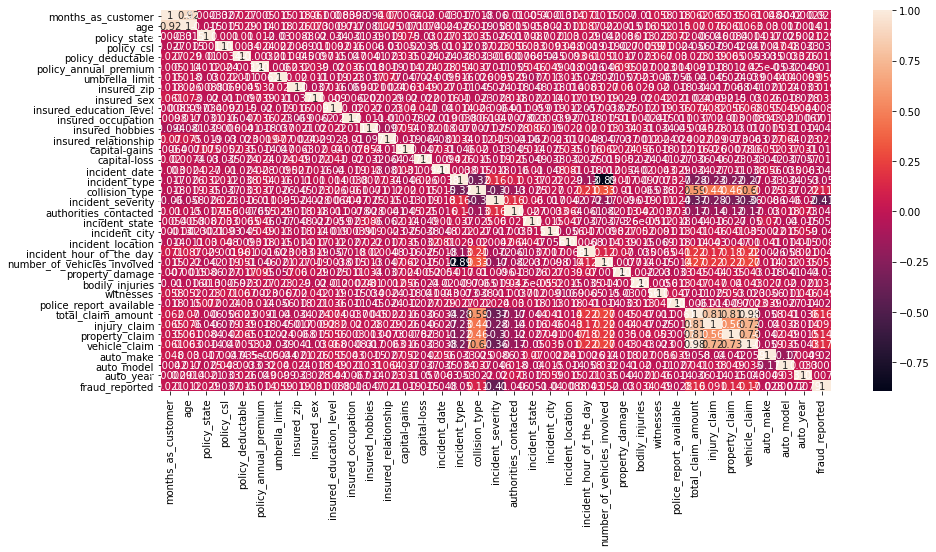

In [79]:
import matplotlib.pyplot as plt  
plt.figure(figsize=(15,7))
sns.heatmap(at.corr(),annot=True)

In [42]:
corr_matrix=at.corr()
corr_matrix['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
incident_location             -0.008832
policy_annual_premium         -0.014480
capital-loss                  -0.014863


### Through Correlation, we see that the major factors which have positive contribution to Fraud reported are vehicle_claim,total_claim_amount ,property_claim,collision_type and injury_claim . On the other hand incident_severity is negatively correlated to Fraud resported. 

### Now to seperate dependent and independent variables, x and y,

In [43]:
x=at.drop("fraud_reported",axis=1)
y=at["fraud_reported"]

In [44]:
x.skew().sort_values(ascending=False)

umbrella_limit                 1.806712
insured_zip                    0.816554
number_of_vehicles_involved    0.502664
age                            0.478988
capital-gains                  0.478850
policy_deductable              0.477887
property_claim                 0.378169
months_as_customer             0.362177
incident_severity              0.279016
injury_claim                   0.264811
insured_sex                    0.148630
property_damage                0.106418
incident_type                  0.101507
policy_csl                     0.088928
insured_relationship           0.077488
police_report_available        0.052967
incident_city                  0.049531
witnesses                      0.019636
bodily_injuries                0.014777
incident_date                  0.004756
policy_annual_premium          0.004402
incident_location              0.000000
insured_education_level       -0.000148
auto_make                     -0.018797
policy_state                  -0.026177


### We see that the data is skewed and to bring the skewness in the range of (-0.5,0.5) using power transform


In [45]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [46]:
type(x_new)

numpy.ndarray

In [47]:
x=pd.DataFrame(x_new,columns=x.columns)

In [48]:
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.051279,1.008733,1.146048,0.178846,0.067784,0.616676,-0.349113,0.0,1.076953,0.568665,...,0.108332,0.517616,1.207630,0.715714,0.005762,1.081793,0.753697,0.859111,-1.808345,-0.197455
1,0.304536,0.431433,0.071806,0.178846,1.271863,-0.242577,1.357817,0.0,1.076953,0.568665,...,-1.254857,-1.410682,-1.248928,-1.776979,-1.525347,-1.557391,-1.786629,0.418616,-0.586225,0.302622
2,-0.511226,-1.139513,1.146048,-1.237596,1.271863,0.642206,1.357817,0.0,-0.928546,1.462749,...,1.178068,1.290743,0.143401,-0.716825,0.223833,-0.577507,-0.820881,-0.555149,0.944905,0.302622
3,0.523344,0.327852,-1.259374,0.178846,1.271863,0.652860,1.644005,0.0,-0.928546,1.462749,...,0.108332,0.517616,0.143401,0.391426,-0.026762,-0.034793,0.677602,-0.828189,1.252785,1.497810
4,0.304536,0.631918,-1.259374,1.230487,0.067784,1.342030,1.644005,0.0,1.076953,-1.631894,...,-1.254857,-0.355794,0.143401,-1.729802,-1.304154,-1.622102,-1.740038,-1.809810,1.022679,0.640027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.287530,0.002457,1.146048,1.230487,0.067784,0.222833,-0.349113,0.0,-0.928546,1.025429,...,-1.254857,-0.355794,-1.248928,1.338829,1.638435,0.403281,1.259186,-0.049272,-1.194088,0.135129
996,0.741446,0.327852,-1.259374,-1.237596,0.067784,0.739122,-0.349113,0.0,-0.928546,1.462749,...,1.178068,1.290743,-1.248928,2.202447,1.717091,1.767003,1.904757,1.481528,0.787622,1.671841
997,-0.549706,-0.470444,1.146048,0.178846,-1.211269,0.520703,0.756509,0.0,-0.928546,1.025429,...,1.178068,1.290743,1.207630,0.553012,0.188267,0.186095,0.777232,1.071136,0.045463,-1.496278
998,1.912654,2.130554,-1.259374,1.230487,1.271863,0.411823,1.357817,0.0,1.076953,-1.631894,...,-1.254857,-0.355794,1.207630,-0.247520,-0.251353,-0.265012,-0.104258,-1.440763,-1.305341,-1.176246


In [49]:
x.skew().sort_values(ascending=False)

number_of_vehicles_involved    0.363693
insured_sex                    0.148630
capital-loss                   0.090488
capital-gains                  0.038722
policy_deductable              0.023988
policy_annual_premium          0.004758
insured_zip                    0.000000
age                           -0.001945
auto_year                     -0.012491
incident_severity             -0.079282
incident_type                 -0.088766
property_damage               -0.091082
policy_csl                    -0.100769
police_report_available       -0.114352
bodily_injuries               -0.128799
months_as_customer            -0.135661
policy_state                  -0.145377
witnesses                     -0.153648
insured_relationship          -0.160421
incident_city                 -0.181772
insured_education_level       -0.188564
collision_type                -0.204204
authorities_contacted         -0.227269
auto_make                     -0.227539
insured_occupation            -0.239336


In [50]:
sk=x.skew()

In [51]:
sk[np.abs(sk)>0.25].all()

True

### Now we need to check whether outliers are present in the data or not. For that we need to check if the z value of all the factors are exceeding the range (-3,3)

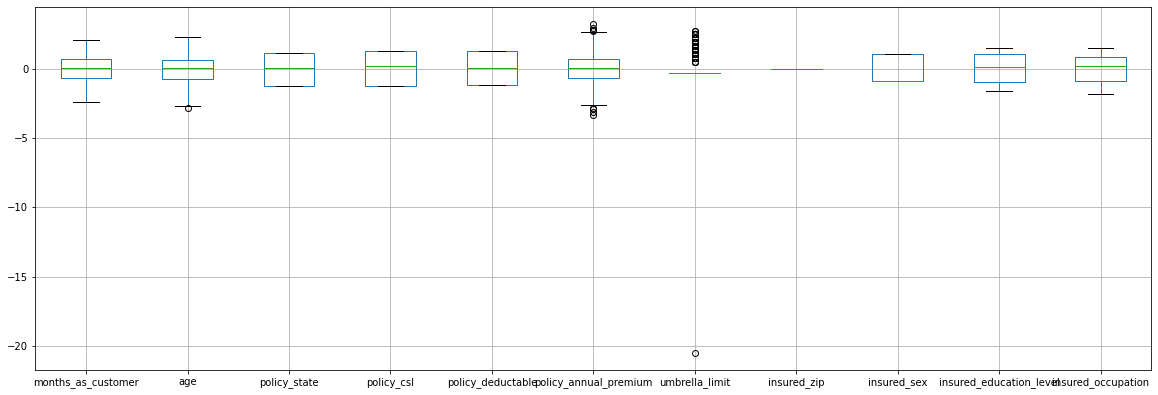

In [52]:
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

### As we see there is just one outlier in umbrella_limit, we can ignore it and proceed with modelling as it will not affect the model much

In [53]:
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.051279,1.008733,1.146048,0.178846,0.067784,0.616676,-0.349113,0.0,1.076953,0.568665,...,0.108332,0.517616,1.207630,0.715714,0.005762,1.081793,0.753697,0.859111,-1.808345,-0.197455
1,0.304536,0.431433,0.071806,0.178846,1.271863,-0.242577,1.357817,0.0,1.076953,0.568665,...,-1.254857,-1.410682,-1.248928,-1.776979,-1.525347,-1.557391,-1.786629,0.418616,-0.586225,0.302622
2,-0.511226,-1.139513,1.146048,-1.237596,1.271863,0.642206,1.357817,0.0,-0.928546,1.462749,...,1.178068,1.290743,0.143401,-0.716825,0.223833,-0.577507,-0.820881,-0.555149,0.944905,0.302622
3,0.523344,0.327852,-1.259374,0.178846,1.271863,0.652860,1.644005,0.0,-0.928546,1.462749,...,0.108332,0.517616,0.143401,0.391426,-0.026762,-0.034793,0.677602,-0.828189,1.252785,1.497810
4,0.304536,0.631918,-1.259374,1.230487,0.067784,1.342030,1.644005,0.0,1.076953,-1.631894,...,-1.254857,-0.355794,0.143401,-1.729802,-1.304154,-1.622102,-1.740038,-1.809810,1.022679,0.640027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.287530,0.002457,1.146048,1.230487,0.067784,0.222833,-0.349113,0.0,-0.928546,1.025429,...,-1.254857,-0.355794,-1.248928,1.338829,1.638435,0.403281,1.259186,-0.049272,-1.194088,0.135129
996,0.741446,0.327852,-1.259374,-1.237596,0.067784,0.739122,-0.349113,0.0,-0.928546,1.462749,...,1.178068,1.290743,-1.248928,2.202447,1.717091,1.767003,1.904757,1.481528,0.787622,1.671841
997,-0.549706,-0.470444,1.146048,0.178846,-1.211269,0.520703,0.756509,0.0,-0.928546,1.025429,...,1.178068,1.290743,1.207630,0.553012,0.188267,0.186095,0.777232,1.071136,0.045463,-1.496278
998,1.912654,2.130554,-1.259374,1.230487,1.271863,0.411823,1.357817,0.0,1.076953,-1.631894,...,-1.254857,-0.355794,1.207630,-0.247520,-0.251353,-0.265012,-0.104258,-1.440763,-1.305341,-1.176246


In [54]:
y

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: fraud_reported, Length: 1000, dtype: float64

### To predict the Frauds taking place in automobile industry we need to do Logistic regression modelling as the value of Fraud Reported is Yes or No which is 0 or 1 thus binary mapping

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [56]:
maxAcc=0
maxRS=0

for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is",maxAcc,"on Random state",maxRS)

Best accuracy is 0.86 on Random state 539


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=539)

In [58]:
x_train

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
901,-2.227614,-2.469552,0.071806,0.178846,-1.211269,-1.397219,1.357817,0.0,-0.928546,-0.426613,...,-1.254857,-1.410682,0.143401,-0.495464,-0.509812,-0.529248,-0.327954,0.641830,0.866561,-1.176246
307,-0.351879,-0.111301,0.071806,0.178846,-1.211269,0.450753,-0.349113,0.0,-0.928546,-1.631894,...,0.108332,0.517616,1.207630,0.222780,-0.110769,-0.120966,0.485932,0.641830,0.627859,-1.176246
155,1.374323,1.186329,1.146048,-1.237596,0.067784,0.077733,-0.349113,0.0,1.076953,-1.631894,...,1.178068,1.290743,0.143401,-0.617620,-2.172270,-2.192879,-0.064033,-1.440763,-1.305341,-1.496278
301,-0.779460,-0.860045,-1.259374,-1.237596,1.271863,-0.973913,1.357817,0.0,1.076953,-1.631894,...,0.108332,0.517616,-1.248928,1.602354,1.248933,2.199652,1.068813,-0.049272,-0.981715,-0.690381
435,-0.831567,-1.285940,1.146048,0.178846,-1.211269,-0.741683,-0.349113,0.0,1.076953,0.568665,...,0.108332,-1.410682,0.143401,0.786792,0.159516,0.156535,1.127637,-0.555149,0.708064,-1.496278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.584323,0.327852,1.146048,-1.237596,-1.211269,0.634666,-0.349113,0.0,1.076953,1.462749,...,0.108332,-1.410682,-1.248928,0.273283,0.758783,-0.207739,0.299890,-1.120455,0.299939,-0.197455
850,-2.037063,-2.469552,0.071806,-1.237596,0.067784,1.228921,-0.349113,0.0,1.076953,-1.631894,...,1.178068,-1.410682,1.207630,1.650931,0.384186,0.387719,2.214124,-1.809810,1.022679,1.497810
144,-0.789813,-0.860045,-1.259374,1.230487,1.271863,0.263606,-0.349113,0.0,-0.928546,0.087366,...,-1.254857,1.290743,1.207630,-0.299394,-0.282965,-0.297372,-0.161213,-1.809810,0.383054,0.980680
124,0.167175,-0.347591,-1.259374,-1.237596,-1.211269,-0.883693,-0.349113,0.0,-0.928546,0.087366,...,0.108332,-0.355794,-1.248928,-0.438312,0.097498,0.092799,-0.562966,-1.120455,1.478457,0.980680


In [59]:
y_train

901    0.0
307    1.0
155    1.0
301    0.0
435    0.0
      ... 
277    1.0
850    0.0
144    0.0
124    0.0
140    0.0
Name: fraud_reported, Length: 800, dtype: float64

In [60]:
x_test

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
452,-0.842092,-0.596670,-1.259374,1.230487,0.067784,0.234471,-0.349113,0.0,-0.928546,-0.988123,...,0.108332,-1.410682,0.143401,-1.802319,-1.525347,-1.771004,-1.803809,-1.440763,-1.420901,-1.336647
519,0.500309,0.532755,-1.259374,1.230487,-1.211269,-0.284412,1.923100,0.0,-0.928546,-1.631894,...,-1.254857,-0.355794,-1.248928,-1.816788,-1.595256,-1.627297,-1.828145,-0.828189,1.252785,1.497810
649,-1.976399,-0.726466,-1.259374,-1.237596,0.067784,-1.179875,-0.349113,0.0,1.076953,0.568665,...,-1.254857,0.517616,-1.248928,0.234518,0.022831,1.107925,0.062526,-0.555149,0.944905,-1.655140
645,0.469449,0.532755,1.146048,-1.237596,1.271863,-0.441878,-0.349113,0.0,-0.928546,0.568665,...,1.178068,-0.355794,1.207630,0.144642,-0.150746,-0.161949,0.397191,-0.049272,-0.981715,1.497810
333,-0.842092,-1.593739,-1.259374,1.230487,0.067784,0.473127,-0.349113,0.0,-0.928546,0.568665,...,1.178068,0.517616,-1.248928,-1.837466,-1.627237,-1.659219,-1.850752,1.071136,0.216000,-1.655140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,1.573226,1.759814,0.071806,1.230487,0.067784,-0.507888,1.062858,0.0,1.076953,0.568665,...,1.178068,1.290743,-1.248928,0.314448,0.644964,0.656587,0.137019,0.859111,-1.669963,0.470921
992,-0.916795,-1.593739,0.071806,-1.237596,-1.211269,-2.186849,-0.349113,0.0,1.076953,0.568665,...,0.108332,0.517616,1.207630,-0.639543,-0.600585,0.156535,-0.685092,0.641830,0.866561,0.809946
475,-0.398076,-0.227932,1.146048,1.230487,1.271863,-0.092032,-0.349113,0.0,-0.928546,1.025429,...,0.108332,-0.355794,0.143401,0.097855,-0.175025,-0.186831,0.344076,0.641830,1.328479,1.671841
50,1.735127,1.911615,1.146048,0.178846,1.271863,0.287660,1.923100,0.0,1.076953,0.568665,...,-1.254857,1.290743,1.207630,1.121991,1.502794,0.308851,1.045083,0.641830,0.866561,-1.176246


In [61]:
y_test

452    0.0
519    0.0
649    1.0
645    0.0
333    0.0
      ... 
877    0.0
992    0.0
475    0.0
50     0.0
300    0.0
Name: fraud_reported, Length: 200, dtype: float64

In [62]:
x_train.shape

(800, 36)

In [63]:
y_train.shape

(800,)

In [64]:
x_test.shape

(200, 36)

In [65]:
y_test.shape

(200,)

### Once we have splitted the data into train and test data we can check the accuracy using various classifiers

### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predlr)*100)
print (confusion_matrix(y_test,predlr))
print (classification_report(y_test,predlr))

Accuracy 86.0
[[157  11]
 [ 17  15]]
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92       168
         1.0       0.58      0.47      0.52        32

    accuracy                           0.86       200
   macro avg       0.74      0.70      0.72       200
weighted avg       0.85      0.86      0.85       200



## Decision Tree Classifier 

In [67]:
from sklearn.tree import DecisionTreeClassifier 
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
preddt=DT.predict(x_test)
print ("Accuracy",accuracy_score(y_test, preddt)*100)
print (confusion_matrix(y_test,preddt))
print (classification_report(y_test,preddt))

Accuracy 87.5
[[148  20]
 [  5  27]]
              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92       168
         1.0       0.57      0.84      0.68        32

    accuracy                           0.88       200
   macro avg       0.77      0.86      0.80       200
weighted avg       0.90      0.88      0.88       200



## RandomForestClassifier

In [68]:
from sklearn.ensemble import RandomForestClassifier 
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
predrf=RF.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predrf)*100)
print (confusion_matrix(y_test,predrf))
print (classification_report(y_test,predrf))

Accuracy 84.5
[[155  13]
 [ 18  14]]
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       168
         1.0       0.52      0.44      0.47        32

    accuracy                           0.84       200
   macro avg       0.71      0.68      0.69       200
weighted avg       0.84      0.84      0.84       200



## Support Vector Classifier

In [69]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsv=svc.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predsv)*100)
print (confusion_matrix(y_test,predsv))
print (classification_report(y_test,predsv))

Accuracy 83.5
[[157  11]
 [ 22  10]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90       168
         1.0       0.48      0.31      0.38        32

    accuracy                           0.83       200
   macro avg       0.68      0.62      0.64       200
weighted avg       0.81      0.83      0.82       200



### Here we see that the best model accuracy is given byDecision Tree Classifier of 87.5% which is very good

## CROSS VALIDATION

In [70]:
from sklearn.model_selection import cross_val_score

scr1=cross_val_score(LR, x, y, cv=5)
print("Cross validation score of Logistic Regression Model is",scr1.mean())

Cross validation score of Logistic Regression Model is 0.7809999999999999


In [71]:
scr2=cross_val_score(RF, x, y, cv=5)
print("Cross validation score of Random Forest Classifier is",scr2.mean())

Cross validation score of Random Forest Classifier is 0.774


In [72]:
scr3=cross_val_score(DT, x, y, cv=5)
print("Cross validation score of Decision Tree Classifier is",scr3.mean())

Cross validation score of Decision Tree Classifier is 0.78


In [73]:
scr4=cross_val_score(svc, x, y, cv=5)
print("Cross validation score of Support Vector Classifier is",scr4.mean())

Cross validation score of Support Vector Classifier is 0.756


### We see that the best accuracy is given by Logistic Regression of 86% and cross validation score as 78.1% and Decision Tree Classifier of 87.5% and cross validation score for the same is 78%which is close to the model accuracy, thus no overfitting or underfitting is present, we can go with any model. Lets check with Hyper parameter testing

## Hyper Parameter Testing

In [74]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['sqrt','auto','log2'],
           'max_depth':range(1,50,3),
           'criterion':['gini','entropy']}

### For Random Forest Classifier

In [75]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 49, 'max_features': 'sqrt'}

In [76]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.865

In [77]:
from sklearn.model_selection import RandomizedSearchCV

grid_param={'min_samples_leaf':range(1,50,3),
            'min_samples_split':range(2,50,3),
           'max_depth':range(1,50,3),
           'criterion':['gini','entropy'],
           'splitter':['best','random']}

### For Decision Tree Classifier

In [78]:
RCV=GridSearchCV(DecisionTreeClassifier(),grid_param,cv=5,scoring='accuracy')
RCV.fit(x_train,y_train)
RCV.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 16,
 'min_samples_split': 8,
 'splitter': 'best'}

In [80]:
RCV_pred=RCV.best_estimator_.predict(x_test)
accuracy_score(y_test,RCV_pred)

0.885

### For Support Vector Classifier

In [81]:
VC=GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
VC.fit(x_train,y_train)
VC.best_params_

{'C': 1, 'kernel': 'linear'}

In [82]:
VC_pred=VC.best_estimator_.predict(x_test)
accuracy_score(y_test,VC_pred)

0.87

### For Logistic Regression Model

In [83]:
LRV=GridSearchCV(LR,param_grid={'C': [0.001,0.01,0.1,1, 10]})
LRV.fit(x_train,y_train)
LRV.best_params_

{'C': 1}

In [84]:
LRV_pred=LRV.best_estimator_.predict(x_test)
accuracy_score(y_test,LRV_pred)

0.86

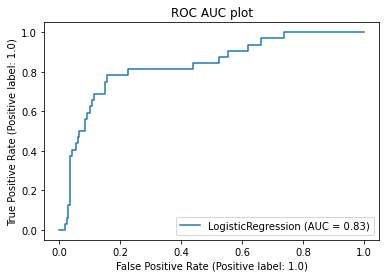

In [85]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(LRV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

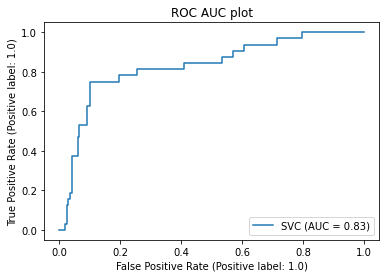

In [86]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(VC.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

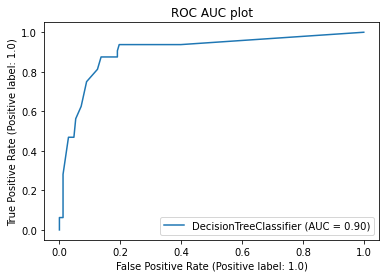

In [88]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(RCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

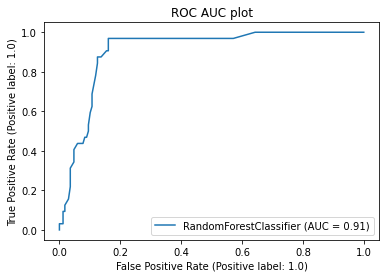

In [89]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

## Through hyper parameter testing the accuracy for the logistic regression model remains the same thus hyper paramater tuning does not affect the model. For Decision Tree Classifier the accuracy increased to 88.5% and the AUC accuracy is 90%, which means the model built is very good

In [90]:
import joblib
joblib.dump(RCV.best_estimator_,"Insurance_Fraud.pkl")

['Insurance_Fraud.pkl']

# Thus through this model we will be able to test whether the Insurance Claim is Fraud or not with 88.5% accuracy, thus this is a very good model which will help the insurance companies to stop the Frauds from happening as this model will tell which factors are the most responsible and can help from Fraud claim happening, instead help the true person indeed